# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Datasets/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values #Because we need a 2D array.
y = dataset.iloc[:, -1].values #1D array (to be reformed in 2D array.)

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y),1) #make y 2D and vertical

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #standard scalar for X
sc_y = StandardScaler() #standard scalar for y
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [11]:
sc_X.inverse_transform(X).reshape(-1, 1)


array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

.reshape(-1,1) is used to ensure the transformed result is in the desired shape (a 2D column vector).

This is useful if the code expects consistent shapes (e.g., for concatenation, further processing, or maintaining compatibility with libraries like scikit-learn).

--> Why Is This Important?
If this reshaping step wasn’t performed, downstream operations (e.g., concatenation, model input) might fail if they expect a specific shape, such as (n, 1) instead of (1,) or (1, 1).

In [12]:
sc_y.inverse_transform([regressor.predict(sc_X.transform([[9]]))])

array([[471671.95587315]])

In [13]:
sc_y.inverse_transform([regressor.predict(sc_X.transform([[6.5]]))]).reshape(-1,1)

array([[170370.0204065]])

## Visualising the SVR results

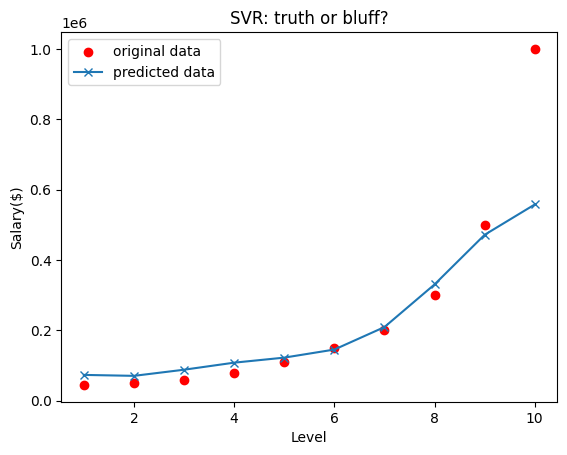

In [14]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), marker = 'o', label = 'original data', color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform([regressor.predict(X)]).reshape(-1,1), marker = 'x', label = 'predicted data')
plt.legend()
plt.title("SVR: truth or bluff?")
plt.xlabel('Level')
plt.ylabel('Salary($)')
plt.show()

The predtiction for salary of CEO (level:10) is an outlier.

## Visualising the SVR results (for higher resolution and smoother curve)

/var/folders/vp/4637syr17gq79cb8mjcw_gb40000gn/T/ipykernel_43697/526399847.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max((sc_X.inverse_transform(X))), 0.1)


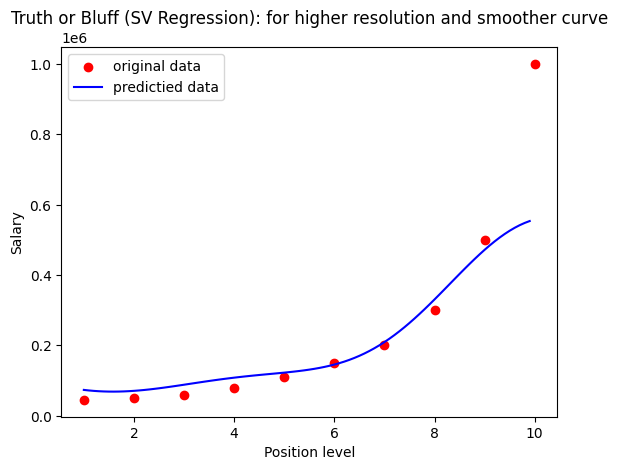

In [15]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max((sc_X.inverse_transform(X))), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), marker = 'o', label = 'original data', color = 'red')
plt.plot(X_grid, sc_y.inverse_transform([regressor.predict(sc_X.transform(X_grid))]).reshape(-1,1), label = 'predictied data', color = 'blue')
plt.title('Truth or Bluff (SV Regression): for higher resolution and smoother curve')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()